In [1]:
import pandas as pd
import numpy as np

### I have been given a dataset about Argentina's president, Alberto Fernandez, in order to create a heatmap analyzing the relation between comments, tweets and likes.

In [2]:
df = pd.read_csv('./alberto3_tweets - alberto3_tweets.csv')

In [3]:
df

,UserName,Handle,Timestamp,Text,Comments,Retweets,Likes,Unnamed: 7
0,Alberto Fernández,@alferdez,2021-12-09T23:29:30.000Z,Alberto Fernández\n@alferdez\n·\n9 dic. Hace 2...,670,453,1500,FILA 250
1,Alberto Fernández,@alferdez,2021-12-09T17:02:42.000Z,Alberto Fernández\n@alferdez\n·\n9 dic.Este vi...,1000,1500,4800,NaN
2,Alberto Fernández,@alferdez,2021-12-09T11:06:37.000Z,Alberto Fernández\n@alferdez\n·\n9 dic.Las 12 ...,579,496,1900,NaN
3,Alberto Fernández,@alferdez,2021-12-02T21:04:21.000Z,Alberto Fernández\n@alferdez\n·\n2 dic.Agradez...,81,116,445,NaN
4,Alberto Fernández,@alferdez,2021-12-02T21:04:21.000Z,Alberto Fernández\n@alferdez\n·\n2 dic.He deci...,384,482,1500,NaN
...,...,...,...,...,...,...,...,...
659,Alberto Fernández,@alferdez,2019-12-10T18:05:13.000Z,Alberto Fernández\n@alferdez\n·\n10 dic. 2019E...,173,1300,5700,NaN
660,Alberto Fernández,@alferdez,2019-12-10T15:47:12.000Z,Alberto Fernández\n@alferdez\n·\n10 dic. 20191...,1900,16700,79300,NaN
661,Alberto Fernández,@alferdez,2019-12-10T14:43:02.000Z,Alberto Fernández\n@alferdez\n·\n10 dic. 2019E...,774,5000,18300,NaN
662,Alberto Fernández,@alferdez,2019-12-10T10:31:13.000Z,Alberto Fernández\n@alferdez\n·\n10 dic. 2019G...,11400,25200,152300,NaN


### I will now drop an useless column.

In [4]:
df.drop(columns = 'Unnamed: 7', inplace=True)

In [5]:
df

,UserName,Handle,Timestamp,Text,Comments,Retweets,Likes
0,Alberto Fernández,@alferdez,2021-12-09T23:29:30.000Z,Alberto Fernández\n@alferdez\n·\n9 dic. Hace 2...,670,453,1500
1,Alberto Fernández,@alferdez,2021-12-09T17:02:42.000Z,Alberto Fernández\n@alferdez\n·\n9 dic.Este vi...,1000,1500,4800
2,Alberto Fernández,@alferdez,2021-12-09T11:06:37.000Z,Alberto Fernández\n@alferdez\n·\n9 dic.Las 12 ...,579,496,1900
3,Alberto Fernández,@alferdez,2021-12-02T21:04:21.000Z,Alberto Fernández\n@alferdez\n·\n2 dic.Agradez...,81,116,445
4,Alberto Fernández,@alferdez,2021-12-02T21:04:21.000Z,Alberto Fernández\n@alferdez\n·\n2 dic.He deci...,384,482,1500
...,...,...,...,...,...,...,...
659,Alberto Fernández,@alferdez,2019-12-10T18:05:13.000Z,Alberto Fernández\n@alferdez\n·\n10 dic. 2019E...,173,1300,5700
660,Alberto Fernández,@alferdez,2019-12-10T15:47:12.000Z,Alberto Fernández\n@alferdez\n·\n10 dic. 20191...,1900,16700,79300
661,Alberto Fernández,@alferdez,2019-12-10T14:43:02.000Z,Alberto Fernández\n@alferdez\n·\n10 dic. 2019E...,774,5000,18300
662,Alberto Fernández,@alferdez,2019-12-10T10:31:13.000Z,Alberto Fernández\n@alferdez\n·\n10 dic. 2019G...,11400,25200,152300


### We'll now convert Timestamp column to pandas datetime type.

In [6]:
df['month_year'] = df['Timestamp'].str.slice(0,7)
df['Timestamp'] = pd.to_datetime(df['Timestamp'].str.slice(0,10))

In [7]:
df

,UserName,Handle,Timestamp,Text,Comments,Retweets,Likes,month_year
0,Alberto Fernández,@alferdez,2021-12-09,Alberto Fernández\n@alferdez\n·\n9 dic. Hace 2...,670,453,1500,2021-12
1,Alberto Fernández,@alferdez,2021-12-09,Alberto Fernández\n@alferdez\n·\n9 dic.Este vi...,1000,1500,4800,2021-12
2,Alberto Fernández,@alferdez,2021-12-09,Alberto Fernández\n@alferdez\n·\n9 dic.Las 12 ...,579,496,1900,2021-12
3,Alberto Fernández,@alferdez,2021-12-02,Alberto Fernández\n@alferdez\n·\n2 dic.Agradez...,81,116,445,2021-12
4,Alberto Fernández,@alferdez,2021-12-02,Alberto Fernández\n@alferdez\n·\n2 dic.He deci...,384,482,1500,2021-12
...,...,...,...,...,...,...,...,...
659,Alberto Fernández,@alferdez,2019-12-10,Alberto Fernández\n@alferdez\n·\n10 dic. 2019E...,173,1300,5700,2019-12
660,Alberto Fernández,@alferdez,2019-12-10,Alberto Fernández\n@alferdez\n·\n10 dic. 20191...,1900,16700,79300,2019-12
661,Alberto Fernández,@alferdez,2019-12-10,Alberto Fernández\n@alferdez\n·\n10 dic. 2019E...,774,5000,18300,2019-12
662,Alberto Fernández,@alferdez,2019-12-10,Alberto Fernández\n@alferdez\n·\n10 dic. 2019G...,11400,25200,152300,2019-12


### I will sort all the different amounts of likes.

In [8]:
n_likes_sorted = sorted(df['Likes'].to_numpy())
n_registers = len(n_likes_sorted)
n_registers

664

### Then, I will calculate floor values of the ranges for my analysis so that each range has the same amount of registers.

### In this case, I will use five ranges, number which can be changed by altering the n_ranges variable.

In [9]:
range_floors = []
n_ranges = 5
for i in range(n_ranges):
    range_floors.append(n_likes_sorted[i * n_registers // n_ranges])
range_floors

[2, 905, 2600, 4800, 10300]

### I'll give each range an id.

In [10]:
range_dict = {i: f'{range_floors[i]}-{range_floors[i+1]}' for i in range(len(range_floors) - 1)}
range_dict[len(range_floors) - 1] = f'> {range_floors[-1]}'

In [11]:
range_dict

{0: '2-905', 1: '905-2600', 2: '2600-4800', 3: '4800-10300', 4: '> 10300'}

### Now I will add a new column to a dataframe so that each row maps to one of the ranges created.

In [12]:
df['like_range'] = None
df['like_range_id'] = None

for i in range(len(range_floors) - 1):
    df.loc[(df['Likes'] >= range_floors[i]) & (df['Likes'] < range_floors[i+1]), 'like_range'] = range_dict[i]
    df.loc[(df['Likes'] >= range_floors[i]) & (df['Likes'] < range_floors[i+1]), 'like_range_id'] = i
    
df['like_range'] = df['like_range'].fillna(range_dict[len(range_floors) - 1])
df['like_range_id'] = df['like_range_id'].fillna(len(range_floors) - 1)
df

,UserName,Handle,Timestamp,Text,Comments,Retweets,Likes,month_year,like_range,like_range_id
0,Alberto Fernández,@alferdez,2021-12-09,Alberto Fernández\n@alferdez\n·\n9 dic. Hace 2...,670,453,1500,2021-12,905-2600,1
1,Alberto Fernández,@alferdez,2021-12-09,Alberto Fernández\n@alferdez\n·\n9 dic.Este vi...,1000,1500,4800,2021-12,4800-10300,3
2,Alberto Fernández,@alferdez,2021-12-09,Alberto Fernández\n@alferdez\n·\n9 dic.Las 12 ...,579,496,1900,2021-12,905-2600,1
3,Alberto Fernández,@alferdez,2021-12-02,Alberto Fernández\n@alferdez\n·\n2 dic.Agradez...,81,116,445,2021-12,2-905,0
4,Alberto Fernández,@alferdez,2021-12-02,Alberto Fernández\n@alferdez\n·\n2 dic.He deci...,384,482,1500,2021-12,905-2600,1
...,...,...,...,...,...,...,...,...,...,...
659,Alberto Fernández,@alferdez,2019-12-10,Alberto Fernández\n@alferdez\n·\n10 dic. 2019E...,173,1300,5700,2019-12,4800-10300,3
660,Alberto Fernández,@alferdez,2019-12-10,Alberto Fernández\n@alferdez\n·\n10 dic. 20191...,1900,16700,79300,2019-12,> 10300,4
661,Alberto Fernández,@alferdez,2019-12-10,Alberto Fernández\n@alferdez\n·\n10 dic. 2019E...,774,5000,18300,2019-12,> 10300,4
662,Alberto Fernández,@alferdez,2019-12-10,Alberto Fernández\n@alferdez\n·\n10 dic. 2019G...,11400,25200,152300,2019-12,> 10300,4


### Now we will get the average comments per like range.

In [13]:
like_ranges_vs_comments = df.groupby('like_range_id')[['Comments', 'like_range']].agg({'Comments':'mean'})
like_ranges_vs_comments

,Comments
like_range_id,
0,54.583333
1,280.924242
2,513.390977
3,1058.582090
4,2274.330827


In [14]:
like_ranges_vs_comments.index = [range_dict[like_ranges_vs_comments.index[i]] for i in range(len(like_ranges_vs_comments))]

### And we plot the relation between the variables.

<AxesSubplot:title={'center':'Likes vs Comments correlation'}, xlabel='Tweets Like-ranges', ylabel='Comments average for range'>

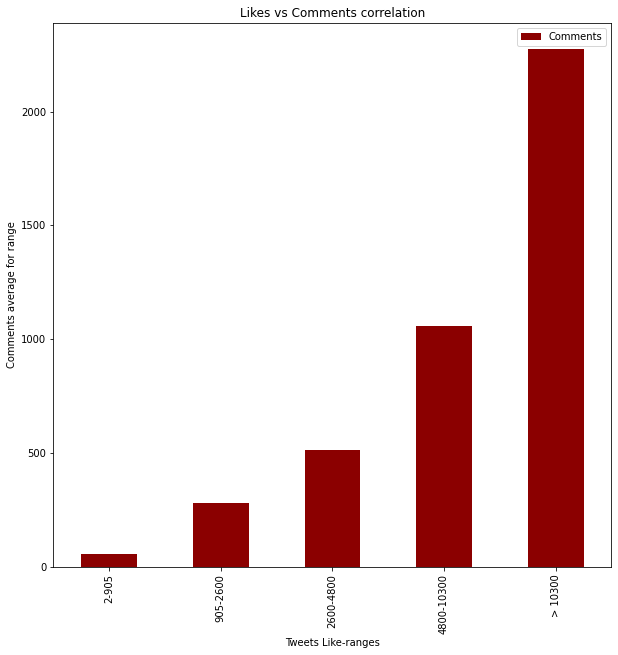

In [15]:
like_ranges_vs_comments.plot(kind='bar', y = 'Comments', figsize=(10,10),\
                            xlabel = 'Tweets Like-ranges', ylabel = 'Comments average for range',
                            title = 'Likes vs Comments correlation', color = 'darkred')

### In the next rows, we will plot the same type of bar chart, but this time the Y axis represents the quotient between likes and comments for each given range.

In [16]:
df['Like_comm_quotient'] = df['Likes'] / df['Comments']
df

,UserName,Handle,Timestamp,Text,Comments,Retweets,Likes,month_year,like_range,like_range_id,Like_comm_quotient
0,Alberto Fernández,@alferdez,2021-12-09,Alberto Fernández\n@alferdez\n·\n9 dic. Hace 2...,670,453,1500,2021-12,905-2600,1,2.238806
1,Alberto Fernández,@alferdez,2021-12-09,Alberto Fernández\n@alferdez\n·\n9 dic.Este vi...,1000,1500,4800,2021-12,4800-10300,3,4.800000
2,Alberto Fernández,@alferdez,2021-12-09,Alberto Fernández\n@alferdez\n·\n9 dic.Las 12 ...,579,496,1900,2021-12,905-2600,1,3.281520
3,Alberto Fernández,@alferdez,2021-12-02,Alberto Fernández\n@alferdez\n·\n2 dic.Agradez...,81,116,445,2021-12,2-905,0,5.493827
4,Alberto Fernández,@alferdez,2021-12-02,Alberto Fernández\n@alferdez\n·\n2 dic.He deci...,384,482,1500,2021-12,905-2600,1,3.906250
...,...,...,...,...,...,...,...,...,...,...,...
659,Alberto Fernández,@alferdez,2019-12-10,Alberto Fernández\n@alferdez\n·\n10 dic. 2019E...,173,1300,5700,2019-12,4800-10300,3,32.947977
660,Alberto Fernández,@alferdez,2019-12-10,Alberto Fernández\n@alferdez\n·\n10 dic. 20191...,1900,16700,79300,2019-12,> 10300,4,41.736842
661,Alberto Fernández,@alferdez,2019-12-10,Alberto Fernández\n@alferdez\n·\n10 dic. 2019E...,774,5000,18300,2019-12,> 10300,4,23.643411
662,Alberto Fernández,@alferdez,2019-12-10,Alberto Fernández\n@alferdez\n·\n10 dic. 2019G...,11400,25200,152300,2019-12,> 10300,4,13.359649


In [17]:
like_ranges_vs_comment_quotient = df.groupby('like_range_id')[['Like_comm_quotient', 'like_range']].agg({'Like_comm_quotient':'mean'})
like_ranges_vs_comment_quotient

,Like_comm_quotient
like_range_id,
0,15.743305
1,13.864339
2,15.546124
3,12.148850
4,19.482574


In [18]:
like_ranges_vs_comment_quotient.index = [range_dict[like_ranges_vs_comment_quotient.index[i]] for i in range(len(like_ranges_vs_comment_quotient))]

<AxesSubplot:title={'center':'Likes / Comments correlation'}, xlabel='Tweets Like-ranges', ylabel='Like/Comment quotient for range'>

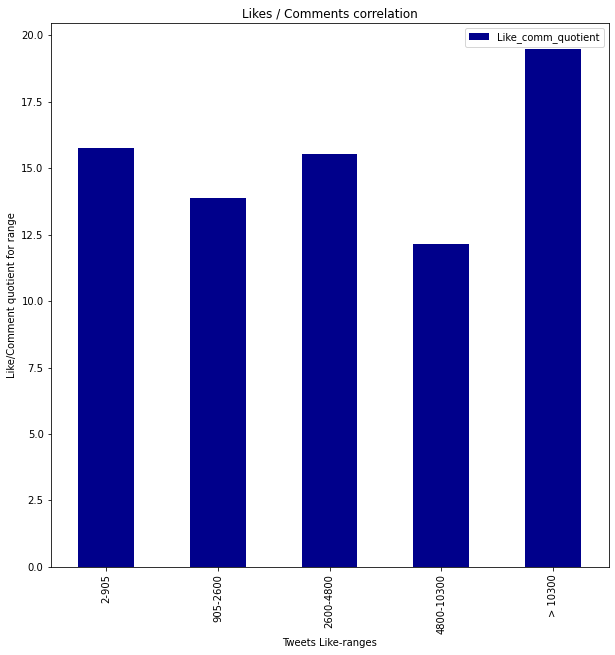

In [19]:
like_ranges_vs_comment_quotient.plot(kind='bar', y = 'Like_comm_quotient', figsize=(10,10),\
                            xlabel = 'Tweets Like-ranges', ylabel = 'Like/Comment quotient for range',
                            title = 'Likes / Comments correlation', color = 'darkblue')

### We will now plot the tendencies of likes, comments and retweets numbers of the last two years.

In [20]:
df['month'] = df['Timestamp'].dt.month
df['year'] = df['Timestamp'].dt.year

In [21]:
df

,UserName,Handle,Timestamp,Text,Comments,Retweets,Likes,month_year,like_range,like_range_id,Like_comm_quotient,month,year
0,Alberto Fernández,@alferdez,2021-12-09,Alberto Fernández\n@alferdez\n·\n9 dic. Hace 2...,670,453,1500,2021-12,905-2600,1,2.238806,12,2021
1,Alberto Fernández,@alferdez,2021-12-09,Alberto Fernández\n@alferdez\n·\n9 dic.Este vi...,1000,1500,4800,2021-12,4800-10300,3,4.800000,12,2021
2,Alberto Fernández,@alferdez,2021-12-09,Alberto Fernández\n@alferdez\n·\n9 dic.Las 12 ...,579,496,1900,2021-12,905-2600,1,3.281520,12,2021
3,Alberto Fernández,@alferdez,2021-12-02,Alberto Fernández\n@alferdez\n·\n2 dic.Agradez...,81,116,445,2021-12,2-905,0,5.493827,12,2021
4,Alberto Fernández,@alferdez,2021-12-02,Alberto Fernández\n@alferdez\n·\n2 dic.He deci...,384,482,1500,2021-12,905-2600,1,3.906250,12,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,Alberto Fernández,@alferdez,2019-12-10,Alberto Fernández\n@alferdez\n·\n10 dic. 2019E...,173,1300,5700,2019-12,4800-10300,3,32.947977,12,2019
660,Alberto Fernández,@alferdez,2019-12-10,Alberto Fernández\n@alferdez\n·\n10 dic. 20191...,1900,16700,79300,2019-12,> 10300,4,41.736842,12,2019
661,Alberto Fernández,@alferdez,2019-12-10,Alberto Fernández\n@alferdez\n·\n10 dic. 2019E...,774,5000,18300,2019-12,> 10300,4,23.643411,12,2019
662,Alberto Fernández,@alferdez,2019-12-10,Alberto Fernández\n@alferdez\n·\n10 dic. 2019G...,11400,25200,152300,2019-12,> 10300,4,13.359649,12,2019


<AxesSubplot:title={'center':"Average likes per Alberto Fernandez's tweets in months from 12/2019 to 12/2021"}, xlabel='Month', ylabel='Average likes per tweet in month'>

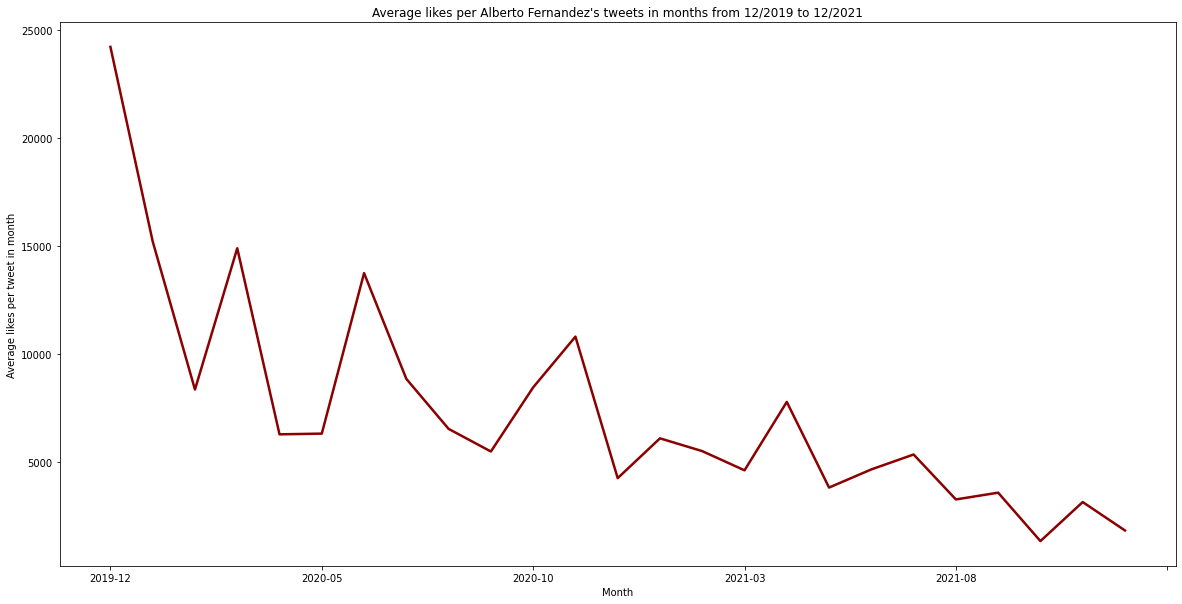

In [22]:
df.groupby('month_year')['Likes'].agg('mean').plot(figsize = (20,10), color = 'darkred',
                                                  xlabel = 'Month', ylabel = 'Average likes per tweet in month',
                                                  title = "Average likes per Alberto Fernandez's tweets in months from 12/2019 to 12/2021",
                                                  linewidth = 2.5)

<AxesSubplot:title={'center':"Average comments per Alberto Fernandez's tweets in months from 12/2019 to 12/2021"}, xlabel='Month', ylabel='Average comments per tweet in month'>

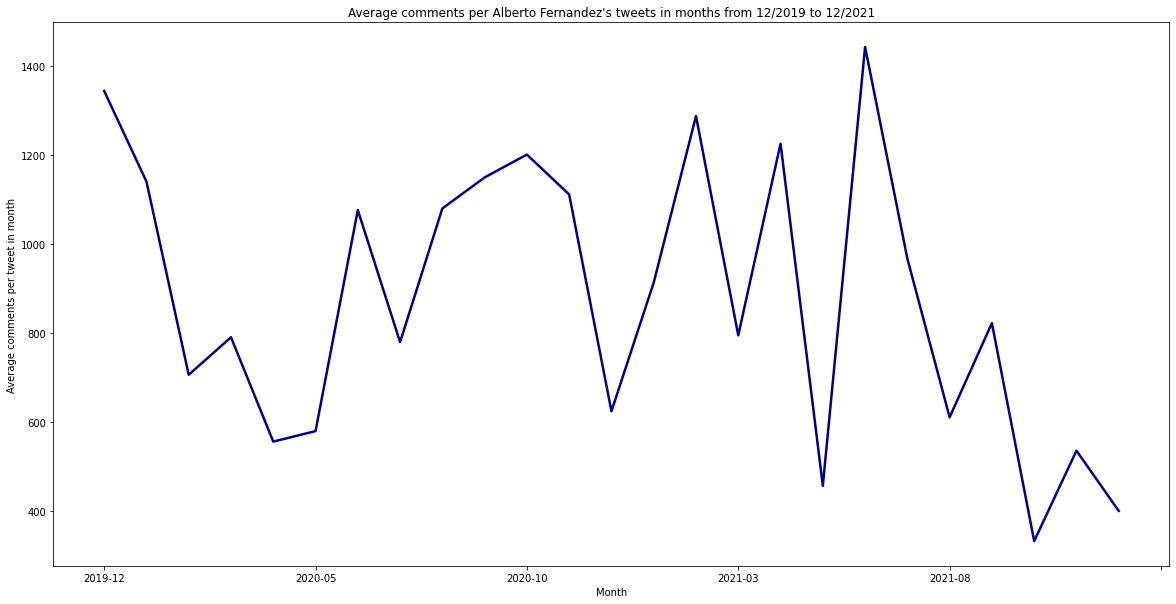

In [23]:
df.groupby('month_year')['Comments'].agg('mean').plot(figsize = (20,10), color = 'darkblue',
                                                  xlabel = 'Month', ylabel = 'Average comments per tweet in month',
                                                  title = "Average comments per Alberto Fernandez's tweets in months from 12/2019 to 12/2021",
                                                  linewidth = 2.5)

<AxesSubplot:title={'center':"Average likes per Alberto Fernandez's tweets in months from 12/2019 to 12/2021"}, xlabel='Month', ylabel='Average likes per tweet in month'>

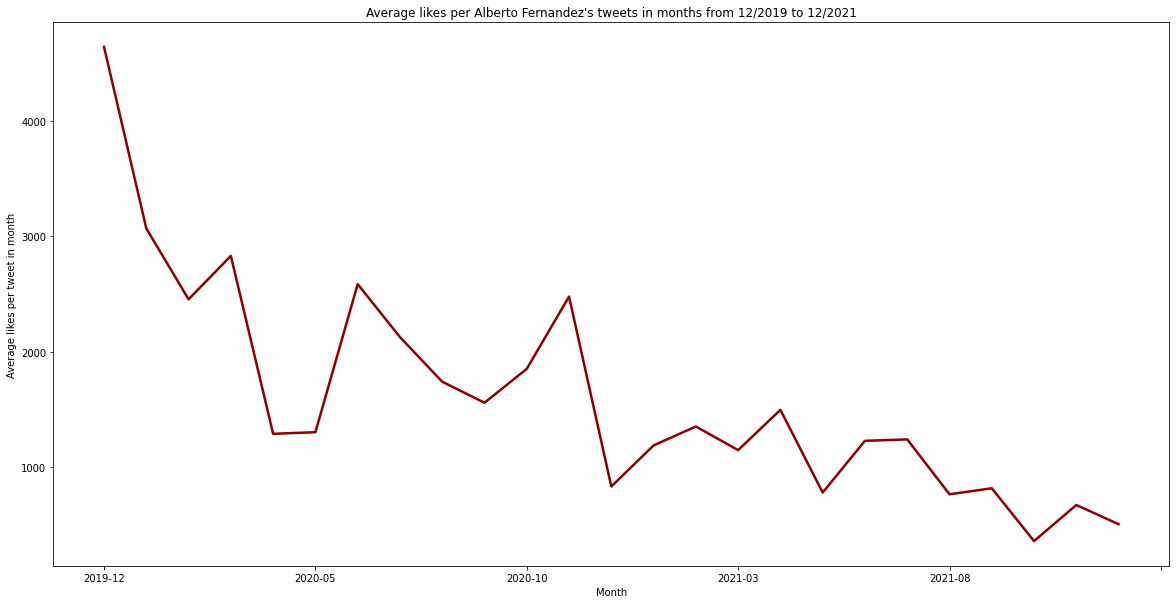

In [25]:
df.groupby('month_year')['Retweets'].agg('mean').plot(figsize = (20,10), color = 'darkred',
                                                  xlabel = 'Month', ylabel = 'Average retweets per tweet in month',
                                                  title = "Average retweets per Alberto Fernandez's tweets in months from 12/2019 to 12/2021",
                                                  linewidth = 2.5)

### We conclude that likes and retweets numbers appear to behave similarly, while comments numbers are more volatile.

<AxesSubplot:title={'center':"Like and retweet comparison per Alberto Fernandez's tweets in months from 12/2019 to 12/2021"}, xlabel='Month', ylabel='Average likes and retweets per tweet in month'>

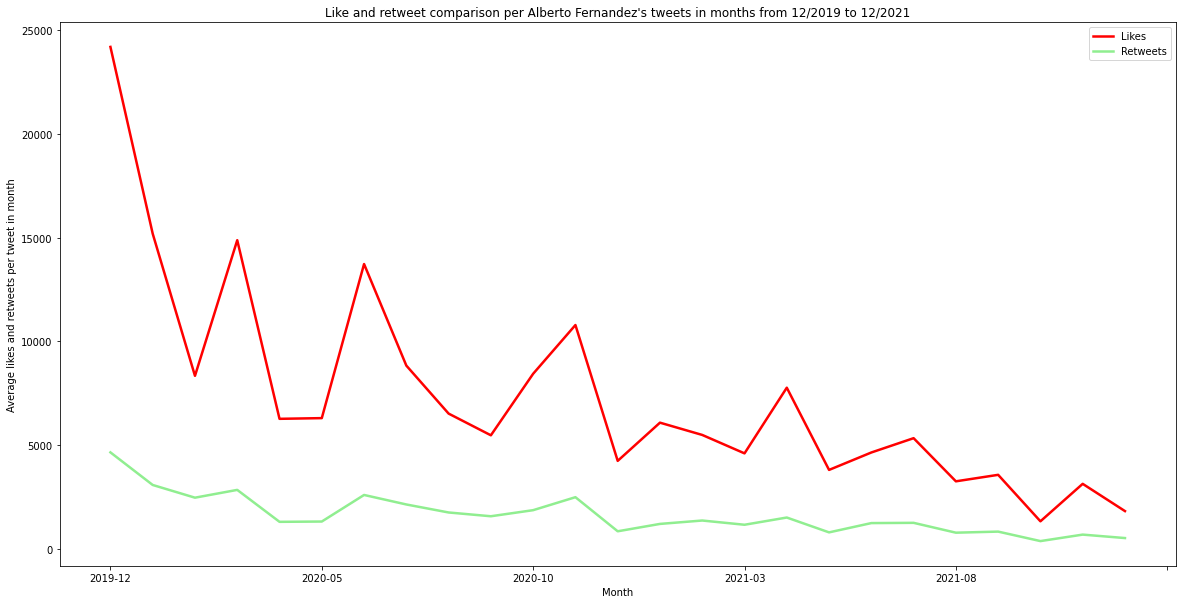

In [32]:
df.groupby('month_year')[['Likes', 'Retweets']].agg('mean').plot(figsize = (20,10), color = ['red', 'lightgreen'],
                                                  xlabel = 'Month', ylabel = 'Average likes and retweets per tweet in month',
                                                  title = "Like and retweet comparison per Alberto Fernandez's tweets in months from 12/2019 to 12/2021",
                                                  linewidth = 2.5)

### In this last graphic, we can reaffirm that likes and retweets numbers behave similarly, as they have had shared their peaks abd 